In [1]:
# %load_ext autotime
# !pip install autotime
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import pandas as pd
from pathlib import Path
import re
import os
from Bio.PDB import PDBList, MMCIFParser, PDBIO, Select
from Bio.PDB.PDBExceptions import PDBConstructionWarning
import warnings
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from Bio import PDB

project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
    
sys.path.insert(0, os.path.abspath('../'))

from proteinttt.utils.parsers import extract_sequence_from_pdb

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 1000)

# Prepare Dataset

In [6]:
def convert_boltz_json_to_cif_and_pdb(json_path, output_dir, pdb_id):
    cif_filename = f"cif/{pdb_id}.cif"
    pdb_filename = f"pdb/{pdb_id}.pdb"

    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(os.path.join(output_dir, "cif"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, "pdb"), exist_ok=True)

    output_cif_path = os.path.join(output_dir, cif_filename)
    output_pdb_path = os.path.join(output_dir, pdb_filename)

    with open(json_path, 'r') as f:
        data = json.load(f)

    if "structures" in data and len(data["structures"]) > 0:
        cif_content = data["structures"][0]["structure"]

        with open(output_cif_path, "w") as f:
            f.write(cif_content)
        
        try:
            parser = PDB.MMCIFParser(QUIET=True)
            structure = parser.get_structure("boltz2", output_cif_path)
            
            io = PDB.PDBIO()
            io.set_structure(structure)
            io.save(output_pdb_path)
        except Exception as e:
            print(f"Could not convert to PDB (might be due to complex structure): {e}")
    else:
        print("No structures found in the JSON file.")

convert_boltz_json_to_cif_and_pdb("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/predicted_structures/Boltz2/7x77.json", "/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/predicted_structures/Boltz2", "7x77")

In [ ]:
df = pd.read_csv("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/summary.csv")
df

,Target,Submission Date,"Difficulty = 75 for Easy, average lDDT between 50 and 75 for Medium and average lDDT Hard. Help section"">",Quaternary State of Target,# of Monomeric Models (Homo-oligomeric),ref. PDB [Chain],Sequence Length (residues),Method,Resolution,sequence,sequence_length,chain_id,pdb_id
0,2022-06-25_00000009_1,2022-06-25,1,2,83,7dri [A],493,X-RAY DIFFRACTION,2.72,TTGEPLTAFETFLPRVVMAEKIQDYQDSDAHEYMKAVQGYLDRFAVGDRLQNATRDLLVTFALAETGEKLSKRLPDQRVYMRDTFERHKDSADDRSAYLRHLRDTAAFIGNAWEPANNSPRALPGLEASAMTDTVKLCLAFLNSLKHTIAIAPLVRFYSEAVHADEGEAREKRVAEFEKAIKAITAFTVFWRATRRGTGNIDSQYRAVMAGADSLTGIGPLARQWAEPDATKPDPDVDAEALKKELAARLSDPKGKGGVPNLASFLADASALPLYKISPPLARFLLLAAYHDTIEDPDNPGLIVQGKAGVASCFTADGWEDDTHLTIEHIAPQSATSGWDAEFYSDKETVHKLGNLVLAPGAANASLSSRPWTEKKVLYAALGASTADDAKSILNSSGFTFAQTTEDLAAMSRYLPHLRALGQREDELDPAFMDQRADVLLRLAYTRLKGWLGLELSDSSSDPVVKVDDVE,471,A,7dri
1,2022-06-25_00000058_1,2022-06-25,1,0,87,7pln [A],271,X-RAY DIFFRACTION,3.15,KDIVKILTASTTVTKTGPPPISAECPHNMVVLFGFVVKQNFWDHTNKLQSYEMEICESGASSCTSKQTNKYDVSYTYIECGPQALPFTEQVVSVSGTTYNSVKCPNDYSVLFGFGMATSSGHQSALYSYFTPCRPGLKSCSLNMNEHDDKSYIYLVCVDATIWTGLNALSMIAKDDLHSAVGELVVTCPSEGTILTGFYGETHTSSPYTVPFGKCAKSLKACSVHGSHNYRTLFTVALCKNN,242,A,7pln
2,2022-06-25_00000059_1,2022-06-25,1,1,88,7pp2 [A],606,X-RAY DIFFRACTION,2.69,SAAAFDAAEQLIQVWDGTPEALVFEATEDEVAEYLSAVDVAIEHLAMARLEEELRHLMVRHAVPTARGGPLVNPFEDQRELADAYCGIRRDLLDEYLSALGVERLSIDEVQRIEWKHLNDKMKKWVQAVKTVVRVLLAGERRLCDQVLSVSLREECFIESTKGCIMQILSFGDAVAVCPRSPEKLSRILDMYEALAEVIPEMKDLCLGSSGDGVISDVQANLDRLGDAIRGTLFEFGKVLQLESSRRAMTAGEIHPMTRYVMNYLRLLVVYSDTLDALLDMTPLGKRLLKLISYLEANLEEKSKLYEDSALECIFSMNNLLYIVQKVRDSELGKILGDHWVKRRNGKIRQYSKSYLRISWMKVLSFLKDFKNFNLAFEEIYRNQTTWKVPDPQLREELKISISENVIPAYRAFLGRYGIKYTPEDLESQLSDLFEGAPGPAN,442,A,7pp2
3,2022-06-25_00000109_1,2022-06-25,1,0,83,7t9x [A],73,X-RAY DIFFRACTION,1.52,PLGSVSEACPVCEKTVQNPCVLETGYVACYPCAISYLVNNEGHCPVTNKKLLGCTYNKHTNKWEVVTGIRKLI,73,A,7t9x
4,2022-06-25_00000113_1,2022-06-25,0,2,84,7tdv [C],449,X-RAY DIFFRACTION,2.92,RTFTKEDIRKFVEEENVRYLRLQFTDILGTIKNVEVPVSQLEKVLDNEMMFDGSSIEGFVRIEESDMYLHPDLDTWVIFPWTAGQGKVARLICDVYKTDGTPFEGDPRANLKRVLKEMEDLGFTDFNLGPEPEFFLFKLDEKGEPTLELNDDGGYFDLAPTDLGENCRRDIVLELEDMGFDIEASHHEVAPGQHEIDFKYADAVTACDNIQTFKLVVKTIARKHNLHATFMPKPLFGVNGSGMHFNVSLFKGKENAFFDPNTEMGLTETAYQFTAGVLKNARGFTAVCNPLVNSYKRLVPGYEAPCYIAWSGKNRSPLIRVPSSRGLSTRIEVRSVDPAANPYMALAAILEAGLDGIKNKLKVPEPVNQNIYEMNREEREAVGIQDLPSTLYTALKAMRENEVIKKALGNHIYNQFINSKSIEWDYYRTQVSEWERDQYMKQY,443,C,7tdv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2022-04-02_00000127_1,2022-04-02,0,2,73,7r09 [A],351,X-RAY DIFFRACTION,2.08,SPLRVALYGFGNQNKEMAKMLVERKDVEIVAVISNKSNVGKDFGEVIGLAPQGILVTAGLDAAETLRTTNPQIAMLSTLSTVGDIESQLRACAENKVNVYTIAEELTFSWTSAPEKTKEMDELFKEHNVSLIGGGFLDGACCDMARTMAAMMHKIDKLDGGLQYNVDHYGQVLAIAHGVGLSEEEFYAENGPGWTSPTSYPKSYVYNMNDWFASAFGLTVIKTEEVKTPTKAPIELYSEAIGRAIPVGQCTGMIVTATTTTEEGVIIVEKQVGKCYEDGDEDMVFMNLEGNPTGGVGFTMKNPPTPAMTNTIAISRMFQTVDAPAGYITTDKLPTMEAYVHGRL,344,A,7r09
190,2022-04-02_00000229_1,2022-04-02,1,2,78,7vu7 [A],108,SOLUTION NMR,0.00,GSSRLPSLINGIMSSMQGGGFNYQNFGNVLSQFATGTGTCNSNDLNLLMDALLSALHTLSYQGMGTVPSYPSPSAMSAYSQSVRRCFGY,89,A,7vu7
191,2022-04-02_00000250_1,2022-04-02,0,2,76,7wnw [B],336,X-RAY DIFFRACTION,2.13,ATPVTIIGLGAMGTALANAFLDAGHSTTVWNRTAARATALAARGAHHAETVTEAIAASPLVIACVLDYDAFHETLAPATDALAGRALVNLTTGTPKQARETASWAADHRIDYLDGKIMAIPPGIATPDSFILYSGPLGTFEAHRSTLEVLGAANHVGTDAGLASLHDIALLTGMYGMIAGILQAFALIDSEGIPAGDLAPMLTNWLTGAAHSVAHYAQQIDTGDYETGVVFNLAHQSHGFAKLVQAGEDQGVDVGLLRPLFELMRHQVAAGYGNGDVASVIELIRREERR,290,B,7wnw
192,2022-04-02_00000254_1,2022-04-02,0,2,74,7wwr [A],30,X-RAY DIFFRACTION,1.30,PGPGPGKPGANGLSGERGPGPGPG,24,A,7wwr


In [3]:
pdbs = []
for file in os.listdir("/scratch/project/open-35-8/data/cameo/proteinttt_test"):
    if file.endswith(".pdb"):
        print(file)
        pdbs.append(file.split("_")[0])

7er0_A.pdb
7qii_B.pdb
7raw_A.pdb
7mq4_A.pdb
7tvy_B.pdb
7qre_D.pdb
7oa7_A.pdb
7eqs_A.pdb
7qao_A.pdb
7x77_A.pdb
7poi_C.pdb
7ri3_C.pdb
7vrb_A.pdb
7f4s_D.pdb
7zro_A.pdb
7rps_A.pdb
7ovp_A.pdb
7sxb_A.pdb


In [5]:
df18 = df.query("pdb_id in @pdbs")

In [10]:
df18 = df.query("pdb_id == '7ri3'")

In [11]:
df18['pLDDT_AlphaFold2'] = None
df18['lddt_AlphaFold2'] = None
df18['tm_score_AlphaFold2'] = None

/tmp/ipykernel_629656/418753170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['pLDDT_AlphaFold2'] = None
/tmp/ipykernel_629656/418753170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['lddt_AlphaFold2'] = None
/tmp/ipykernel_629656/418753170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
for i, row in df18.iterrows():
    json_path = f"/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/predicted_structures/Boltz2/{row['pdb_id']}.json"
    convert_boltz_json_to_cif_and_pdb(json_path, "/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/predicted_structures/Boltz2", row['pdb_id']) 

In [12]:
from proteinttt.utils.structure import calculate_metrics
import os

pred_dir = Path("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/predicted_structures/AlphaFold2")

for i, row in df18.iterrows():
    true_path = Path("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/pdb") / f"{row['pdb_id']}_{row['chain_id']}.pdb"
    
    pdb_id_lower = row['pdb_id'].lower()
    pred_file = "7ri3_a8a47_unrelaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb"
    if pred_file:
        pred_path = pred_dir / pred_file
        tm_score_AlphaFold2, lddt_AlphaFold2, plddt_AlphaFold2 = calculate_metrics(true_path, pred_path, row['chain_id'], f'/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/predicted_structures/Boltz2_fixed/{row["pdb_id"]}.pdb')
        df18.loc[i, 'lddt_AlphaFold2'] = lddt_AlphaFold2
        df18.loc[i, 'tm_score_AlphaFold2'] = tm_score_AlphaFold2
        df18.loc[i, 'pLDDT_AlphaFold2'] = plddt_AlphaFold2
    else:
        print(f"No prediction found for {row['pdb_id']}")


Sequence matches exactly.


In [13]:
df18

,Target,Submission Date,"Difficulty = 75 for Easy, average lDDT between 50 and 75 for Medium and average lDDT Hard. Help section"">",Quaternary State of Target,# of Monomeric Models (Homo-oligomeric),ref. PDB [Chain],Sequence Length (residues),Method,Resolution,sequence,sequence_length,chain_id,pdb_id,pLDDT_AlphaFold2,lddt_AlphaFold2,tm_score_AlphaFold2
160,2022-04-16_00000167_1,2022-04-16,2,0,73,7ri3 [C],587,X-RAY DIFFRACTION,2.69,VENIQVAEITPSTRIVYRGVSPAEFIYLEGNKFSRAQSPTQGNDDPQWKALYTGSDANVSSRNITDNPGGVVKIEYPSDWKVLEITSTTPSQKWHNDGEAWPVWRAVKKWAASNQVDLPDVTASNIDDYLLLDELGKKKIILKKPIGEDDVSSHEFIIPWKAETVAQNKIDSTSDPAAKFFTPDDLDSTTKQPKDQAAVRRILKKWDAYSCKGGASATFGVASLCGINVAAYKADIEKLIKDVYEDPNFSDLKNRTGGPQKDKDTLKGYYERLKPKVETLRPLKAGVSSAVGAAGAISWAIGVADAFTSENVSSFDKAAAVTAIVPGLGECVGIANAIDKRDPEGLIINTISAALASAAVPVLAPIGVALDAGLAAAQGVATVLEYLEIGQPARTPLPVSSPKTHKGVTAAWVGSERIIAHRPRPGRQHIFSVSIDSSKPEYTAPLIEVAGVRADGKLDPSPEWIRIRQNHYPIPFRFEKLSGDSPYAFRCVLLRPTTITRTEPVYVTFAYTSDTCRTGESDPNKACSPNNPAIAVRFGSLVKNEDERSVLAVTWPGPSIRPETNWIKLPYSIHPY,576,C,7ri3,41.259323,0.370455,0.30149


In [27]:
df18
df18.to_csv("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/summary18_with_Boltz.csv", index=False)

In [15]:
df18.dropna(subset=['lddt_AlphaFold2']).to_csv("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/summary_with_AlphaFold2.csv", index=False)

In [ ]:
class SaveChainSelect(Select):
    """
    Selects a specific model and chain, and only standard residues (ATOMs),
    ignoring HETATMs.
    """
    def __init__(self, chain_id_to_keep, model_id_to_keep=0):
        self.chain_id_to_keep = chain_id_to_keep
        self.model_id_to_keep = model_id_to_keep

    def accept_model(self, model):
        # Only accept the first model (or specified model)
        return 1 if model.get_id() == self.model_id_to_keep else 0

    def accept_chain(self, chain):
        # Only accept the specified chain
        return 1 if chain.get_id() == self.chain_id_to_keep else 0

    def accept_residue(self, residue):
        # Only accept standard residues (no HETATMs)
        # ' ' means a standard residue (ATOM), 'H_' for HETATMs
        return 1 if residue.get_id()[0] == ' ' else 0

    def accept_atom(self, atom):
        # Accept all atoms of the accepted residues
        return 1


def download_chain_and_get_sequence(pdb_chain_str, download_dir="pdb_files"):
    """
    Downloads a PDB structure, extracts a specific chain, saves that chain
    to a new PDB file, and returns the file path and its sequence.
    
    Uses the extract_sequence_from_pdb function from proteinttt.utils.parsers
    to extract the sequence from the saved PDB file.

    Args:
        pdb_chain_str (str): A string in the format "PDB_ID [CHAIN_ID]", 
                             e.g., "7dri [A]".
        download_dir (str): The directory to save downloaded files.

    Returns:
        tuple: (new_pdb_path, sequence)
               Returns (None, None) on failure.
    """
    match = re.search(r'(\w{4})\s*\[([\w\d]+)\]', pdb_chain_str)
    if not match:
        print(f"Error: Invalid format for '{pdb_chain_str}'. Expected 'PDBID [CHAIN]'.")
        return None
        
    pdb_id = match.group(1).upper()  # PDB IDs are always uppercase
    chain_id = match.group(2)
    
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)

    pdbl = PDBList()
    try:
        full_structure_path = pdbl.retrieve_pdb_file(
            pdb_id, 
            pdir=download_dir + '/cif', 
            file_format='mmCif'
        )
    except Exception as e:
        print(f"Error downloading {pdb_id}: {e}")
        return None
    
    if not os.path.exists(full_structure_path):
        print(f"Failed to download {pdb_id}.")
        return None

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", PDBConstructionWarning)
        parser = MMCIFParser(QUIET=True)
        
    try:
        structure = parser.get_structure(pdb_id, full_structure_path)
    except Exception as e:
        print(f"Error parsing structure file {full_structure_path}: {e}")
        return None

    try:
        model = structure[0]
        chain = model[chain_id]
    except KeyError:
        print(f"Error: Chain '{chain_id}' not found in Model 0 of {pdb_id}.")
        return None

    output_filename = f"{pdb_id.lower()}_{chain_id}.pdb"
    new_pdb_path = os.path.join(download_dir, output_filename)
    
    io = PDBIO()
    io.set_structure(structure)
    io.save(new_pdb_path, SaveChainSelect(chain_id, model_id_to_keep=0))
    
    sequence = extract_sequence_from_pdb(new_pdb_path, chain=chain_id)
    
    if not sequence:
        print(f"No standard amino acid sequence found for {pdb_id} chain {chain_id}.")
        return None
    
    return sequence

In [5]:
download_chain_and_get_sequence('7tdv [C]')

'RTFTKEDIRKFVEEENVRYLRLQFTDILGTIKNVEVPVSQLEKVLDNEMMFDGSSIEGFVRIEESDMYLHPDLDTWVIFPWTAGQGKVARLICDVYKTDGTPFEGDPRANLKRVLKEMEDLGFTDFNLGPEPEFFLFKLDEKGEPTLELNDDGGYFDLAPTDLGENCRRDIVLELEDMGFDIEASHHEVAPGQHEIDFKYADAVTACDNIQTFKLVVKTIARKHNLHATFMPKPLFGVNGSGMHFNVSLFKGKENAFFDPNTEMGLTETAYQFTAGVLKNARGFTAVCNPLVNSYKRLVPGYEAPCYIAWSGKNRSPLIRVPSSRGLSTRIEVRSVDPAANPYMALAAILEAGLDGIKNKLKVPEPVNQNIYEMNREEREAVGIQDLPSTLYTALKAMRENEVIKKALGNHIYNQFINSKSIEWDYYRTQVSEWERDQYMKQY'

In [5]:
for i, row in df.iterrows():
    seq = download_chain_and_get_sequence(row['ref. PDB [Chain]'],'/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/pdb' )
    df.loc[i, 'sequence'] = seq

Desired structure doesn't exist
Failed to download 7UW7.
Structure exists: '/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/pdb/cif/7vrs.cif' 


In [6]:
df.sequence.fillna("", inplace=True)
df['sequence_length'] = df['sequence'].apply(len)

/tmp/ipykernel_1476861/2562521342.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sequence.fillna("", inplace=True)


In [7]:
df['chain'] = df['ref. PDB [Chain]'].str.split(' ').str[1]
df['chain'] = df['chain'].str.replace('[', '').str.replace(']', '')
df.chain.value_counts()

chain
A    117
B     37
C     18
D     11
K      4
E      2
G      1
N      1
H      1
L      1
I      1
Name: count, dtype: int64

In [8]:
df['pdb_id'] = df['ref. PDB [Chain]'].str.split(' ').str[0]
df.pdb_id.value_counts()
# df.to_csv('/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/summary.csv', index=False)

pdb_id
7vrs    2
7rps    1
7qs2    1
7qs5    1
7r5z    1
       ..
7w3r    1
7w6b    1
7waw    1
7znx    1
7x8v    1
Name: count, Length: 193, dtype: int64

In [12]:
df.to_csv('/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/summary.csv', index=False)

In [11]:
df = pd.read_csv("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/summary.csv")

## MSA

In [12]:
from proteinttt.utils.msa import MSAServer
from pathlib import Path

# Create MSA server with cache directory
msa_cache_dir = Path("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa")
msa_cache_dir.mkdir(parents=True, exist_ok=True)
msa_server = MSAServer(cache_dir=msa_cache_dir)

# Generate MSA for each protein in CAMEO dataset
for i, row in df.iterrows():
    pdb_id = row['pdb_id']
    chain_id = row['chain']
    sequence = row['sequence']
    
    if not sequence:  # Skip if no sequence
        continue
    
    # Generate unique ID for this protein
    seq_id = f"{pdb_id}_{chain_id}"
    
    print(f"Generating MSA for {seq_id}...")
    try:
        # This will download and cache the MSA file
        msa_path = msa_server.get(seq=sequence, seq_id=seq_id)
        print(f"  ✓ MSA saved to: {msa_path}")
    except Exception as e:
        print(f"  ✗ Error: {e}")

Generating MSA for 7dri_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:09 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7dri_A.a3m
Generating MSA for 7pln_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:28 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pln_A.a3m
Generating MSA for 7pp2_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:23 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pp2_A.a3m
Generating MSA for 7t9x_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:04 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7t9x_A.a3m
Generating MSA for 7tdv_C...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:07 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7tdv_C.a3m
Generating MSA for 7tec_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:02 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7tec_A.a3m
Generating MSA for 7b8b_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:06 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7b8b_A.a3m
Generating MSA for 7f5k_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:03 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7f5k_A.a3m
Generating MSA for 7oq6_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:04 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7oq6_A.a3m
Generating MSA for 7ou3_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:21 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ou3_A.a3m
Generating MSA for 7ouu_B...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:02 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ouu_B.a3m
Generating MSA for 7qqa_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:02 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7qqa_A.a3m
Generating MSA for 7qvb_B...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7qvb_B.a3m
Generating MSA for 7r0r_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7r0r_A.a3m
Generating MSA for 7u5o_C...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7u5o_C.a3m
Generating MSA for 7v40_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:04 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7v40_A.a3m
Generating MSA for 7w7a_G...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:05 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7w7a_G.a3m
Generating MSA for 7x77_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:49 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7x77_A.a3m
Generating MSA for 7zmn_K...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:23 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7zmn_K.a3m
Generating MSA for 7zmp_K...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:57 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7zmp_K.a3m
Generating MSA for 7zmq_K...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:48 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7zmq_K.a3m
Generating MSA for 7zmr_K...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:41 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7zmr_K.a3m
Generating MSA for 7zro_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:55 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7zro_A.a3m
Generating MSA for 7f08_N...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:45 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7f08_N.a3m
Generating MSA for 7f15_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:36 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7f15_B.a3m
Generating MSA for 7f4l_D...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:40 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7f4l_D.a3m
Generating MSA for 7f4s_D...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:44 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7f4s_D.a3m
Generating MSA for 7mni_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:40 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7mni_C.a3m
Generating MSA for 7mnk_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:28 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7mnk_A.a3m
Generating MSA for 7mnv_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:51 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7mnv_B.a3m
Generating MSA for 7mny_D...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:55 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7mny_D.a3m
Generating MSA for 7mo1_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:56 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7mo1_B.a3m
Generating MSA for 7mo3_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:39 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7mo3_B.a3m
Generating MSA for 7n8u_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:53 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7n8u_A.a3m
Generating MSA for 7pcs_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:49 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pcs_B.a3m
Generating MSA for 7vmt_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:42 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vmt_B.a3m
Generating MSA for 7x0f_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
RUNNING:  97%|█████████▋| 146/150 [elapsed: 03:28 remaining: 00:04]Sleeping for 9s. Reason: RUNNING
RUNNING: |          | 155/? [elapsed: 03:38 remaining: 00:00]      Sleeping for 5s. Reason: RUNNING
RUNNING: |          | 160/? [elapsed: 03:44 remaining: 00:00]Sleeping for 8s. Reason: RUNNING
RUNNING: |          | 168/? [elapsed: 03:52 remaining: 00:00]Sleeping for 10s. Reason: RUNNING
RUNNING: |          | 178/? [elapsed: 04:03 remaining: 00:00]Sleeping for 9s. Reason: RUNNING
COMPLETE: |          | 178/? [elapsed: 04:15 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7x0f_C.a3m
Generating MSA for 7xif_D...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:03 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7xif_D.a3m
Generating MSA for 7xkg_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:02 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7xkg_A.a3m
Generating MSA for 7xoi_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:04 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7xoi_A.a3m
Generating MSA for 7ezb_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:31 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ezb_A.a3m
Generating MSA for 7ezn_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:28 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ezn_A.a3m
Generating MSA for 7n45_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:24 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7n45_A.a3m
Generating MSA for 7opt_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:56 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7opt_A.a3m
Generating MSA for 7pb9_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:46 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pb9_A.a3m
Generating MSA for 7pgf_D...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:59 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pgf_D.a3m
Generating MSA for 7pgi_D...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:59 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pgi_D.a3m
Generating MSA for 7re5_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:24 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7re5_B.a3m
Generating MSA for 7uw7_A...
  ✗ Error: 'float' object is not iterable
Generating MSA for 7vqw_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:02 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vqw_A.a3m
Generating MSA for 7vrs_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:48 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vrs_A.a3m
Generating MSA for 7vrs_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:59 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vrs_C.a3m
Generating MSA for 7vty_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:32 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vty_A.a3m
Generating MSA for 7vu4_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:05 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vu4_A.a3m
Generating MSA for 7xh0_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:36 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7xh0_A.a3m
Generating MSA for 8cso_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:47 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/8cso_C.a3m
Generating MSA for 8d1x_D...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:39 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/8d1x_D.a3m
Generating MSA for 7exx_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:17 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7exx_A.a3m
Generating MSA for 7fau_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:46 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7fau_B.a3m
Generating MSA for 7ohz_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:06 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ohz_B.a3m
Generating MSA for 7oio_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:18 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7oio_A.a3m
Generating MSA for 7qii_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:57 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7qii_B.a3m
Generating MSA for 7qwt_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:50 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7qwt_A.a3m
Generating MSA for 7r20_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:45 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7r20_B.a3m
Generating MSA for 7r24_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:48 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7r24_A.a3m
Generating MSA for 7te3_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:59 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7te3_A.a3m
Generating MSA for 7txc_E...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Timeout while submitting to MSA server. Retrying...
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:37 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7txc_E.a3m
Generating MSA for 7tzv_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:49 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7tzv_A.a3m
Generating MSA for 7w3r_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 02:21 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7w3r_A.a3m
Generating MSA for 7w6b_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7w6b_A.a3m
Generating MSA for 7waw_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:14 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7waw_A.a3m
Generating MSA for 7znx_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:44 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7znx_A.a3m
Generating MSA for 8ctr_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:52 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/8ctr_A.a3m
Generating MSA for 7eus_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:16 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7eus_B.a3m
Generating MSA for 7f5g_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:24 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7f5g_B.a3m
Generating MSA for 7pcr_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:50 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pcr_A.a3m
Generating MSA for 7qre_D...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:43 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7qre_D.a3m
Generating MSA for 7r1k_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:56 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7r1k_A.a3m
Generating MSA for 7s69_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:43 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7s69_A.a3m
Generating MSA for 7tvc_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:51 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7tvc_B.a3m
Generating MSA for 7tvy_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:48 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7tvy_B.a3m
Generating MSA for 7vgb_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:58 remaining: 00:00]Error while fetching result from MSA server. Retrying... (1/5)
Error: HTTPSConnectionPool(host='api.colabfold.com', port=443): Read timed out.
COMPLETE: 100%|██████████| 150/150 [elapsed: 02:21 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vgb_A.a3m
Generating MSA for 7vrb_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:10 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vrb_A.a3m
Generating MSA for 7vrc_C...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:11 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vrc_C.a3m
Generating MSA for 8cu5_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:47 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/8cu5_A.a3m
Generating MSA for 8cuk_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:25 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/8cuk_B.a3m
Generating MSA for 7esh_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:10 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7esh_A.a3m
Generating MSA for 7mq4_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:47 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7mq4_A.a3m
Generating MSA for 7ms2_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
RUNNING:  99%|█████████▊| 148/150 [elapsed: 03:28 remaining: 00:02]Sleeping for 9s. Reason: RUNNING
RUNNING: |          | 157/? [elapsed: 03:38 remaining: 00:00]      Sleeping for 10s. Reason: RUNNING
COMPLETE: |          | 157/? [elapsed: 04:05 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ms2_A.a3m
Generating MSA for 7r3p_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:02 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7r3p_A.a3m
Generating MSA for 7r5y_E...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:02 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7r5y_E.a3m
Generating MSA for 7rkc_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:14 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7rkc_A.a3m
Generating MSA for 7sjl_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:06 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7sjl_A.a3m
Generating MSA for 7sxb_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:30 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7sxb_A.a3m
Generating MSA for 7w5m_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:19 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7w5m_A.a3m
Generating MSA for 7wcj_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:24 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7wcj_A.a3m
Generating MSA for 7x4o_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:04 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7x4o_B.a3m
Generating MSA for 7x8j_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:47 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7x8j_A.a3m
Generating MSA for 7zcl_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:32 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7zcl_B.a3m
Generating MSA for 7zgf_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:52 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7zgf_A.a3m
Generating MSA for 7eqh_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:46 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7eqh_A.a3m
Generating MSA for 7er0_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:52 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7er0_A.a3m
Generating MSA for 7ern_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:47 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ern_C.a3m
Generating MSA for 7f0a_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:57 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7f0a_A.a3m
Generating MSA for 7f9h_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:59 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7f9h_A.a3m
Generating MSA for 7mku_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:09 remaining: 00:00]Error while fetching result from MSA server. Retrying... (1/5)
Error: HTTPSConnectionPool(host='api.colabfold.com', port=443): Read timed out.
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:36 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7mku_A.a3m
Generating MSA for 7opb_D...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7opb_D.a3m
Generating MSA for 7poi_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:51 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7poi_C.a3m
Generating MSA for 7prq_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:36 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7prq_B.a3m
Generating MSA for 7psg_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:48 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7psg_C.a3m
Generating MSA for 7so5_H...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:50 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7so5_H.a3m
Generating MSA for 7tze_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:52 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7tze_C.a3m
Generating MSA for 7tzg_D...


COMPLETE: 100%|██████████| 150/150 [elapsed: 01:46 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7tzg_D.a3m
Generating MSA for 7x9e_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:35 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7x9e_A.a3m
Generating MSA for 7z5p_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 01:59 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7z5p_A.a3m
Generating MSA for 7eqs_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7eqs_A.a3m
Generating MSA for 7mla_B...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7mla_B.a3m
Generating MSA for 7n29_B...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:32 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7n29_B.a3m
Generating MSA for 7nqd_B...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:46 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7nqd_B.a3m
Generating MSA for 7oa7_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:22 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7oa7_A.a3m
Generating MSA for 7q4l_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:21 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7q4l_A.a3m
Generating MSA for 7qao_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:45 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7qao_A.a3m
Generating MSA for 7qap_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:49 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7qap_A.a3m
Generating MSA for 7qry_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:27 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7qry_B.a3m
Generating MSA for 7qs2_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:17 remaining: 00:00]Error while fetching result from MSA server. Retrying... (1/5)
Error: HTTPSConnectionPool(host='api.colabfold.com', port=443): Read timed out.
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:43 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7qs2_A.a3m
Generating MSA for 7qs5_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:24 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7qs5_A.a3m
Generating MSA for 7r5z_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:48 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7r5z_B.a3m
Generating MSA for 7r63_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:53 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7r63_C.a3m
Generating MSA for 7t4z_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:45 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7t4z_A.a3m
Generating MSA for 7tni_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:52 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7tni_C.a3m
Generating MSA for 7vnx_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:44 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vnx_A.a3m
Generating MSA for 7ywg_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:49 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ywg_B.a3m
Generating MSA for 7ctx_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
RUNNING:  25%|██▍       | 37/150 [elapsed: 01:34 remaining: 03:15]Sleeping for 7s. Reason: RUNNING
Timeout while fetching status from MSA server. Retrying...
COMPLETE: 100%|██████████| 150/150 [elapsed: 02:19 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ctx_B.a3m
Generating MSA for 7eqe_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:58 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7eqe_A.a3m
Generating MSA for 7ets_B...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:32 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ets_B.a3m
Generating MSA for 7f2y_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7f2y_A.a3m
Generating MSA for 7fev_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:32 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7fev_A.a3m
Generating MSA for 7fjs_L...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:38 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7fjs_L.a3m
Generating MSA for 7ob6_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:14 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ob6_A.a3m
Generating MSA for 7od9_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:27 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7od9_C.a3m
Generating MSA for 7ovp_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:02 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ovp_A.a3m
Generating MSA for 7pb4_I...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:57 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pb4_I.a3m
Generating MSA for 7pxy_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:30 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pxy_A.a3m
Generating MSA for 7qil_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:45 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7qil_A.a3m
Generating MSA for 7rpr_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:48 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7rpr_A.a3m
Generating MSA for 7rps_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7rps_A.a3m
Generating MSA for 7rqf_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:43 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7rqf_A.a3m
Generating MSA for 7sci_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:02 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7sci_A.a3m
Generating MSA for 7vgm_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:32 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vgm_A.a3m
Generating MSA for 7yxg_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:06 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7yxg_A.a3m
Generating MSA for 7f0o_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:54 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7f0o_B.a3m
Generating MSA for 7mhw_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:42 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7mhw_A.a3m
Generating MSA for 7n3t_C...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7n3t_C.a3m
Generating MSA for 7ocn_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:19 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ocn_A.a3m
Generating MSA for 7osw_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7osw_A.a3m
Generating MSA for 7pc3_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:35 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pc3_A.a3m
Generating MSA for 7pc4_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:04 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pc4_A.a3m
Generating MSA for 7pc7_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Timeout while submitting to MSA server. Retrying...
COMPLETE: 100%|██████████| 150/150 [elapsed: 02:12 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pc7_B.a3m
Generating MSA for 7pc9_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:04 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pc9_A.a3m
Generating MSA for 7pno_D...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:07 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pno_D.a3m
Generating MSA for 7ri3_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:33 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ri3_C.a3m
Generating MSA for 7t7y_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:12 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7t7y_A.a3m
Generating MSA for 7u2r_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:39 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7u2r_A.a3m
Generating MSA for 7v1k_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:33 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7v1k_A.a3m
Generating MSA for 7x4e_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:12 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7x4e_A.a3m
Generating MSA for 7elf_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:33 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7elf_C.a3m
Generating MSA for 7eqb_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7eqb_A.a3m
Generating MSA for 7msk_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:52 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7msk_A.a3m
Generating MSA for 7o0b_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:48 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7o0b_A.a3m
Generating MSA for 7q4i_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:50 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7q4i_B.a3m
Generating MSA for 7raw_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:52 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7raw_A.a3m
Generating MSA for 7rpy_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:10 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7rpy_A.a3m
Generating MSA for 7ugh_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:39 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ugh_A.a3m
Generating MSA for 7ulh_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 02:19 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ulh_A.a3m
Generating MSA for 7vna_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:13 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vna_A.a3m
Generating MSA for 7w5s_A...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7w5s_A.a3m
Generating MSA for 7w5u_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:10 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7w5u_A.a3m
Generating MSA for 7wme_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:18 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7wme_A.a3m
Generating MSA for 7x0d_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:28 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7x0d_A.a3m
Generating MSA for 7z79_B...


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:13 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7z79_B.a3m
Generating MSA for 7egt_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:44 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7egt_B.a3m
Generating MSA for 7ejg_C...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:52 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7ejg_C.a3m
Generating MSA for 7fiw_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:21 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7fiw_B.a3m
Generating MSA for 7m5w_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:32 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7m5w_A.a3m
Generating MSA for 7o4o_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:36 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7o4o_A.a3m
Generating MSA for 7p0h_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:12 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7p0h_A.a3m
Generating MSA for 7p3i_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:23 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7p3i_B.a3m
Generating MSA for 7pw1_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:52 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7pw1_A.a3m
Generating MSA for 7qbp_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:00 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7qbp_A.a3m
Generating MSA for 7r09_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:37 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7r09_A.a3m
Generating MSA for 7vu7_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 8s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:51 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7vu7_A.a3m
Generating MSA for 7wnw_B...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:47 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7wnw_B.a3m
Generating MSA for 7wwr_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 6s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 7s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 01:01 remaining: 00:00]


  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7wwr_A.a3m
Generating MSA for 7x8v_A...


SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:43 remaining: 00:00]

  ✓ MSA saved to: /scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/msa/7x8v_A.a3m


# Analyse result

In [2]:
df_results = pd.read_csv("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo/results_420.tsv", sep="\t")
df_results.head()

,Target,Submission Date,"Difficulty = 75 for Easy, average lDDT between 50 and 75 for Medium and average lDDT Hard. Help section"">",Quaternary State of Target,# of Monomeric Models (Homo-oligomeric),ref. PDB [Chain],Sequence Length (residues),Method,Resolution,sequence,sequence_length,chain,pdb_id,pLDDT_ProteinTTT,lddt_ProteinTTT,tm_score_ProteinTTT,pLDDT_ESMFold,lddt_ESMFold,tm_score_ESMFold
0,2022-06-25_00000058_1,2022-06-25,1,0,87,7pln [A],271,X-RAY DIFFRACTION,3.15000,KDIVKILTASTTVTKTGPPPISAECPHNMVVLFGFVVKQNFWDHTNKLQSYEMEICESGASSCTSKQTNKYDVSYTYIECGPQALPFTEQVVSVSGTTYNSVKCPNDYSVLFGFGMATSSGHQSALYSYFTPCRPGLKSCSLNMNEHDDKSYIYLVCVDATIWTGLNALSMIAKDDLHSAVGELVVTCPSEGTILTGFYGETHTSSPYTVPFGKCAKSLKACSVHGSHNYRTLFTVALCKNN,242,A,7pln,81.961251,0.828698,0.92193,78.531151,0.810300,0.91014
1,2022-06-25_00000109_1,2022-06-25,1,0,83,7t9x [A],73,X-RAY DIFFRACTION,1.52000,PLGSVSEACPVCEKTVQNPCVLETGYVACYPCAISYLVNNEGHCPVTNKKLLGCTYNKHTNKWEVVTGIRKLI,73,A,7t9x,87.129820,0.921068,0.93145,84.709953,0.940845,0.94374
2,2022-06-25_00000115_1,2022-06-25,0,2,86,7tec [A],125,X-RAY DIFFRACTION,3.45000,EKEIRRSMPLFPIGPVMKLTDLTARQIRYYEDQGLIHPARNQGNHRLYSLQDIDVLLEIKDYLNDGLNIAGI,72,A,7tec,83.569608,0.918961,0.94383,83.144981,0.920842,0.94620
3,2022-06-18_00000008_1,2022-06-18,0,0,90,7b8b [A],420,X-RAY DIFFRACTION,2.03000,LRTPTTVSVSDFGAKGDGKTDDTQAFVNAWKKACSSNGAVNLLVPKGNTYLLKSIQLTGPCNSILTVQIFGTLSASQKRSDYKDISKWIMFDGVNNLSVDGGDTGVVDGNGETWWQNSCKRNKAKPCTKAPTALTFYNSKSLIVKNLKVRNAQQIQISIEKCSNVQVSNVVVTAPADSPNTDGIHITNTQNIRVSESIIGTGDDCISIESGSQNVQINDITCGPGHGISIGSLGDDNSKAFVSGVTVDGAKLSGTDNGVRIKTYQGGSGTASNIIFQNIQMDNVKNPIIIDQDYCDKSKCTTEKSAVQVKNVVYRDISGTSASENAITFNCSKNYPCQGIVLDRVNIKGGKATCTNANVVDKGAVLPQC,369,A,7b8b,88.292621,0.952159,0.98582,87.236732,0.959212,0.98778
4,2022-06-18_00000029_1,2022-06-18,1,1,88,7f5k [A],200,X-RAY DIFFRACTION,3.00003,KVQQSPESLIVPEGAMSSLNCTFSNSASQSIWWYQQHPGKGPEALISIFSNGNKKEGRLTVYLNRASLHVSLHIRDSQPSDSAVYLCAVSKGSNYQLIWGSGTKLIIKPDIQNPEPAVYQLKDPRSQDSTLCLFTDFDSQINVPKTMESGTFITDKCVLDMKAMDSKSNGAIAWSNQTSFTCQDIFKETNAT,192,A,7f5k,71.414017,0.741901,0.75506,69.511200,0.746547,0.74835


In [3]:
df_results.pLDDT_ProteinTTT.describe()

count    166.000000
mean      81.503591
std       10.650278
min       31.933232
25%       80.228451
50%       84.539989
75%       86.887400
max       96.421172
Name: pLDDT_ProteinTTT, dtype: float64

In [8]:
df_results.pLDDT_ESMFold.describe()

count    166.000000
mean      79.637592
std       12.859090
min       23.689768
25%       78.413340
50%       83.388054
75%       86.805548
max       95.865547
Name: pLDDT_ESMFold, dtype: float64

In [7]:
df_results['plddt_difference'] = df_results.pLDDT_ProteinTTT - df_results.pLDDT_ESMFold
df_results.plddt_difference.describe()

count    166.000000
mean       1.865999
std        3.853798
min       -0.000990
25%        0.099522
50%        0.564308
75%        1.737891
max       34.045300
Name: plddt_difference, dtype: float64

/scratch/project/open-35-8/pimenol1/miniconda3/envs/proteinttt2/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/scratch/project/open-35-8/pimenol1/miniconda3/envs/proteinttt2/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


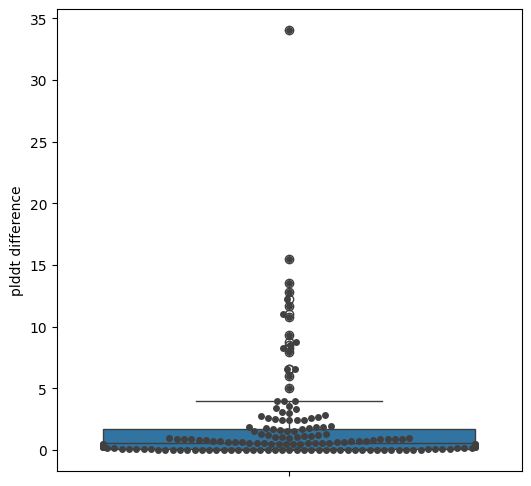

In [ ]:
sub_df = df_results.query('pLDDT_ProteinTTT.notna()')
sub_df['plddt_difference'] = sub_df['pLDDT_ProteinTTT'] - sub_df['pLDDT_ESMFold']
plt.figure(figsize=(6, 6))
sns.boxplot(data=sub_df['plddt_difference'])
sns.swarmplot(data=sub_df['plddt_difference'], color=".25")
plt.ylabel('plddt difference')
plt.show()